In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
ames = pd.read_csv("data/train.csv")

### Nominal Variables

In [57]:
ames.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [60]:
"CentralAir2" in ames.select_dtypes(include='object').columns

False

In [11]:
list1 = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour']

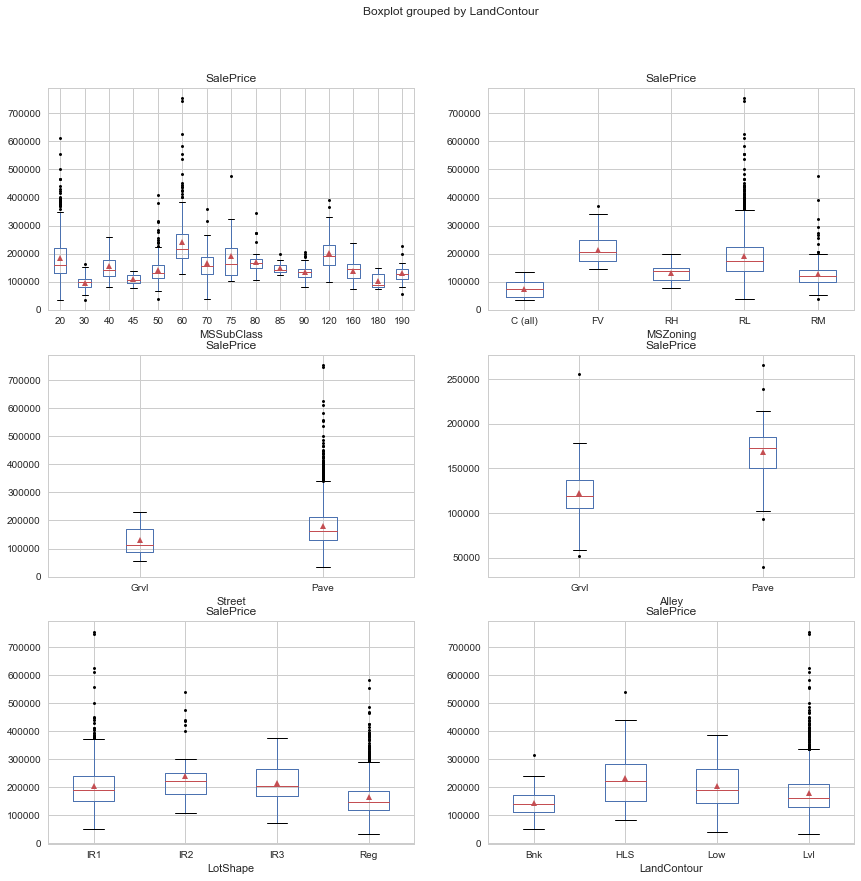

In [12]:
fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
for i in range(0,6):
    ames.boxplot(column='SalePrice',by=list1[i],sym='k.', ax=ax1[i//2,i%2], showmeans=True)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


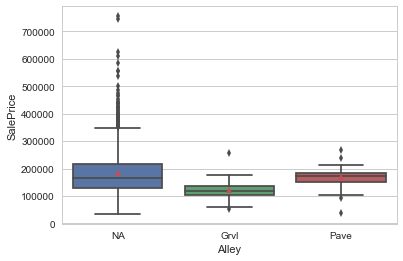

In [10]:
sns.boxplot(x=ames['Alley'].apply(lambda x: 'NA' if pd.isnull(x) else x), y=ames['SalePrice'], showmeans=True)

None from list1 could be clearly ruled out based on box plots. Most of values in 'Alley' are for 'No Alley' (NaN). Missing values should be added as separate category 'NoAlley'.

In [13]:
# ignoring 'Utilities', '
list2 = ['LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType']

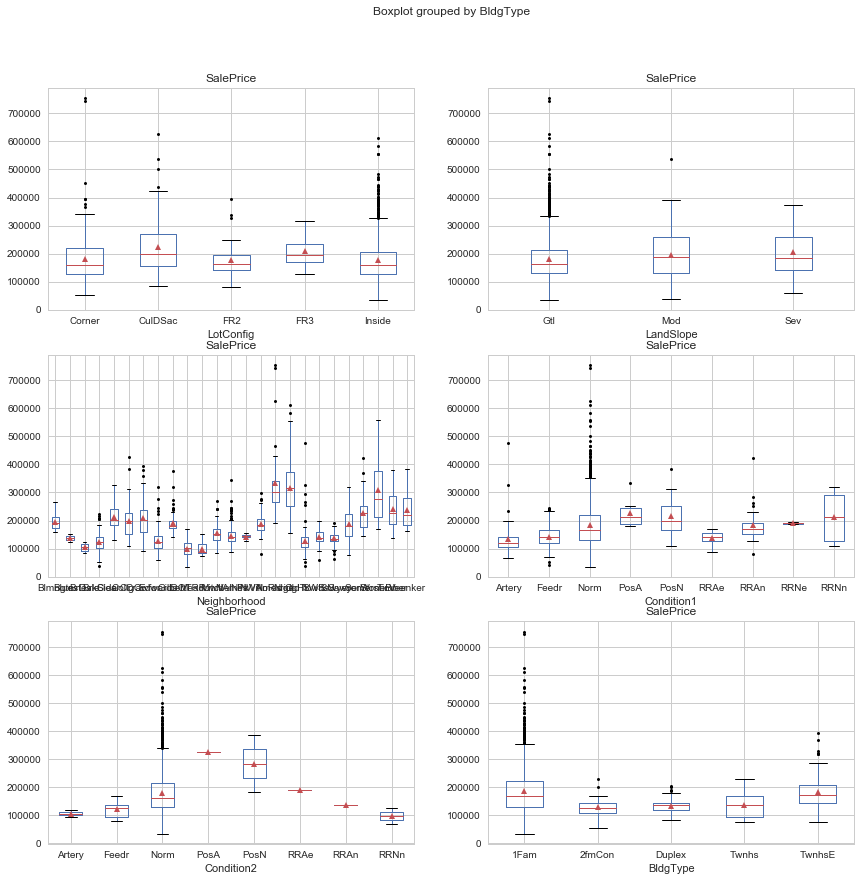

In [14]:
fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
for i in range(0,6):
    ames.boxplot(column='SalePrice',by=list2[i],sym='k.', ax=ax2[i//2,i%2], showmeans=True)

In [17]:
ames['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
am_lm = ols('SalePrice ~ LotConfig', data=ames).fit()

In [20]:
sm.stats.anova_lm(am_lm, typ=2)

,sum_sq,df,F,PR(>F)
LotConfig,1.935444e+11,4.0,7.809954,0.000003
Residual,9.014367e+12,1455.0,NaN,NaN


In [43]:
am_lm = ols('SalePrice ~ Utilities', data=ames).fit()
sm.stats.anova_lm(am_lm, typ=2)

,sum_sq,df,F,PR(>F)
Utilities,1.886693e+09,1.0,0.298804,0.584717
Residual,9.206025e+12,1458.0,NaN,NaN


In [36]:
a = ['x','x','x','y','y','z','z','z']
b = [5,6,7,5,9,5,6,7]
dfab = pd.DataFrame({'a':a, 'b':b})
dfab

,a,b
0,x,5
1,x,6
2,x,7
3,y,5
4,y,9
5,z,5
6,z,6
7,z,7


In [38]:
am_lm = ols('b ~ a', data=dfab).fit()
ta = sm.stats.anova_lm(am_lm, typ=2)

In [47]:
ta['PR(>F)']

a           0.744936
Residual         NaN
Name: PR(>F), dtype: float64

In [51]:
def anova_result(feat, target, df):
    df_lm = ols(target + ' ~ ' + feat, data=df).fit()
    print(feat+":")
    print(sm.stats.anova_lm(df_lm, typ=2))

In [53]:
for feature in list1:
    anova_result(feature,'SalePrice',ames)

MSSubClass:
                  sum_sq      df          F    PR(>F)
MSSubClass  6.541130e+10     1.0  10.431466  0.001266
Residual    9.142500e+12  1458.0        NaN       NaN
MSZoning:
                sum_sq      df          F        PR(>F)
MSZoning  9.904000e+11     4.0  43.840282  8.817634e-35
Residual  8.217511e+12  1455.0        NaN           NaN
Street:
                sum_sq      df        F    PR(>F)
Street    1.550534e+10     1.0  2.45929  0.117049
Residual  9.192406e+12  1458.0      NaN       NaN
Alley:
                sum_sq    df         F        PR(>F)
Alley     4.721637e+10   1.0  35.56206  4.899826e-08
Residual  1.181669e+11  89.0       NaN           NaN
LotShape:
                sum_sq      df          F        PR(>F)
LotShape  7.032607e+11     3.0  40.132852  6.447524e-25
Residual  8.504651e+12  1456.0        NaN           NaN
LandContour:
                   sum_sq      df          F        PR(>F)
LandContour  2.375097e+11     3.0  12.850188  2.742217e-08
Residual     8.